Attempting to load enhanced split data from: processed_faces_newFinal

Successfully loaded enhanced pre-split data!
X_train shape (training features): (784, 159)
X_test shape (testing features): (196, 159)
y_train shape (training labels): (784,)
y_test shape (testing labels): (196,)

--- Starting Hyperparameter Tuning with GridSearchCV for Enhanced Features ---
Performing grid search... This may take some time as it trains many models.
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Grid search complete.

Best parameters found: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best cross-validation score (training set): 0.5370

--- Evaluating Best Model Performance with Enhanced Features ---
Testing Accuracy: 0.6020
Training Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.56      0.71        27
           1       1.00      0.36      0.53        11
           2       0.95      0.54      0.6

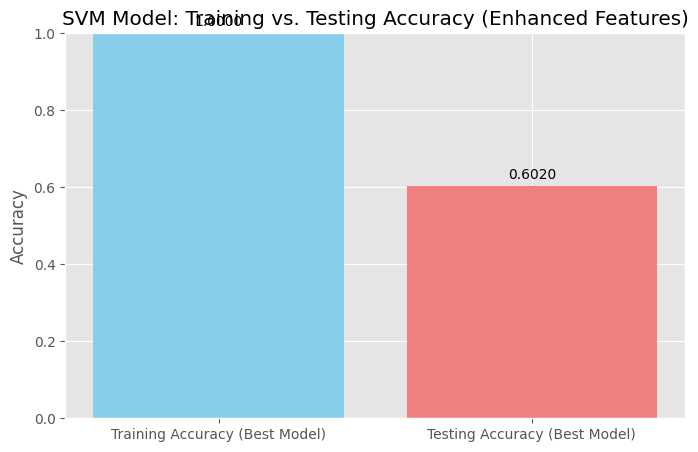

An error occurred during model building or evaluation: name 'y' is not defined


<Figure size 1000x800 with 0 Axes>

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
import joblib 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Define the directory where your enhanced split data is saved
data_dir = 'processed_faces_newFinal'

try:
    # --- Load the pre-split datasets with geometric features ---
    print(f"Attempting to load enhanced split data from: {data_dir}")
    # Note the new filenames for the .joblib files
    X_train = joblib.load(os.path.join(data_dir, 'X_train_geometric.joblib'))
    X_test = joblib.load(os.path.join(data_dir, 'X_test_geometric.joblib'))
    y_train = joblib.load(os.path.join(data_dir, 'y_train_geometric.joblib'))
    y_test = joblib.load(os.path.join(data_dir, 'y_test_geometric.joblib'))
    
    print("\nSuccessfully loaded enhanced pre-split data!")
    print(f"X_train shape (training features): {X_train.shape}")
    print(f"X_test shape (testing features): {X_test.shape}")
    print(f"y_train shape (training labels): {y_train.shape}")
    print(f"y_test shape (testing labels): {y_test.shape}")

    # --- Hyperparameter Tuning with GridSearchCV ---
    print("\n--- Starting Hyperparameter Tuning with GridSearchCV for Enhanced Features ---")

    # Define the parameter grid to search
    # These ranges are carried over from our last tuning step,
    # as they gave good results previously.
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf'] 
    }

    # Initialize the SVM model
    base_svm = SVC(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(base_svm, param_grid, cv=5, verbose=3, n_jobs=-1) 

    # Fit GridSearchCV to the training data
    print("Performing grid search... This may take some time as it trains many models.")
    grid_search.fit(X_train, y_train)
    print("Grid search complete.")

    # Get the best parameters and best score found
    print(f"\nBest parameters found: {grid_search.best_params_}")
    print(f"Best cross-validation score (training set): {grid_search.best_score_:.4f}")

    # Use the best estimator (model with the best parameters) for final evaluation
    model = grid_search.best_estimator_
    print("\n--- Evaluating Best Model Performance with Enhanced Features ---")

    # Make predictions on the test set
    y_pred_test = model.predict(X_test)

    # Calculate and print testing accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    # Calculate training accuracy (using the best estimator)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    # Print classification report (precision, recall, f1-score for each class)
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("\nConfusion Matrix (Test Set):")
    print(cm)

    # --- Visualization ---
    plt.style.use('ggplot') 

    # Plotting Training vs. Testing Accuracy
    plt.figure(figsize=(8, 5))
    accuracy_scores = [train_accuracy, test_accuracy]
    labels = ['Training Accuracy (Best Model)', 'Testing Accuracy (Best Model)']
    colors = ['skyblue', 'lightcoral']
    plt.bar(labels, accuracy_scores, color=colors)
    plt.ylim(0, 1) 
    plt.ylabel('Accuracy')
    plt.title('SVM Model: Training vs. Testing Accuracy (Enhanced Features)')
    for i, score in enumerate(accuracy_scores):
        plt.text(i, score + 0.02, f'{score:.4f}', ha='center')
    plt.show()

    # Plotting Confusion Matrix as a Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(y.unique()), 
                yticklabels=sorted(y.unique()))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap (Test Set) - Enhanced Features')
    plt.show()

    # --- Save the Tuned Model ---
    # Changed filename to indicate it's tuned and trained with geometric features
    model_save_path = os.path.join(data_dir, 'svm_emotion_model_tuned_geometric.joblib') 
    joblib.dump(model, model_save_path)
    print(f"\n✅ Tuned SVM model (with geometric features) saved to: {model_save_path}")

except FileNotFoundError:
    print(f"Error: One or more .joblib files not found in '{data_dir}'.")
    print("Please ensure you have run the updated train_test_splitter.py script first to save the split data with geometric features.")
except Exception as e:
    print(f"An error occurred during model building or evaluation: {e}")

